## Observations and Insights 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
df.iloc[900:920,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
900,g570,Propriva,Male,16,29,30,60.328717,1
901,g570,Propriva,Male,16,29,35,62.330420,2
902,g570,Propriva,Male,16,29,40,68.525856,2
903,g570,Propriva,Male,16,29,45,70.492788,2
904,g867,Stelasyn,Female,9,25,0,45.000000,0
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0


In [3]:
# Checking the number of mice.
unique_mice = df["Mouse ID"].nunique()
unique_mice

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupeless_time = df.drop_duplicates(["Mouse ID", "Timepoint"], keep = "last")
dupeful = df[~df.index.isin(dupeless_time.index)]
dupeful
        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
optional_clean = dupeless_time.drop_duplicates("Mouse ID", keep = "last")
optional_dupes = dupeless_time[~dupeless_time.index.isin(optional_clean.index)]
optional_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = df.drop_duplicates("Mouse ID", keep = "last")
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [21]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].count()

249

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = clean.groupby("Drug Regimen")
tumean = regimen_group["Tumor Volume (mm3)"].mean()
tumed = regimen_group["Tumor Volume (mm3)"].median()
tuvar = regimen_group["Tumor Volume (mm3)"].var()
tustd = regimen_group["Tumor Volume (mm3)"].std()
tusem = regimen_group["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({
    "Mean": tumean,
    "Median": tumed,
    "Variance": tuvar,
    "Standard Deviation": tustd,
    "SEM": tusem
})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_df_agg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

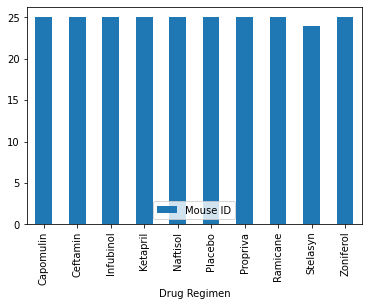

In [44]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimenbar = clean[["Mouse ID","Drug Regimen"]]

regimenbar = regimenbar.groupby("Drug Regimen").count()

regimenbar.plot(kind = "bar")


(-0.75, 10.0)

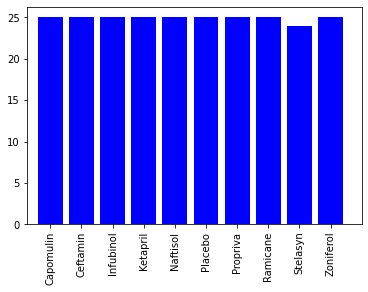

In [62]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(clean["Drug Regimen"].unique()))

tickloc = x_axis
ticks = sorted(clean["Drug Regimen"].unique())
plt.bar(x_axis, regimenbar["Mouse ID"], color = "b", align = "center")
plt.xticks(tickloc, ticks, rotation = "vertical")
plt.xlim(-0.75, len(x_axis))


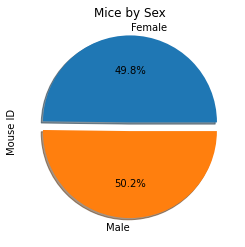

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean.groupby("Sex")["Mouse ID"].count()
gender.plot(kind = "pie", autopct='%1.1f%%', shadow=True, explode = [0.1,0], title = "Mice by Sex")

([<matplotlib.patches.Wedge at 0x262958d2da0>,
 [Text(0.007570010156471776, 1.1999761226567098, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.004415839257941869, 0.6999860715497472, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

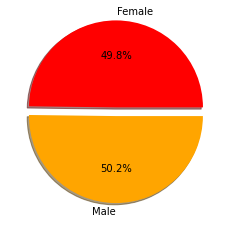

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index
size = gender
colors = ["red", "orange"]
explode = (0.1,0)
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
